In [152]:
import pandas as pd
import numpy as np
df = pd.read_csv("SingaporeHotels.csv")
df.head(20)

,Hotel Name,Rating,Review
0,"PARKROYAL COLLECTION Pickering, Singapore",5,I would like to thank Serene and her team for ...
1,"PARKROYAL COLLECTION Pickering, Singapore",5,It was a wonderful and nice experience. Food-...
2,"PARKROYAL COLLECTION Pickering, Singapore",5,My friends and I stayed at the Collection Room...
3,"PARKROYAL COLLECTION Pickering, Singapore",5,We had a staycation with friends in the weekda...
4,"PARKROYAL COLLECTION Pickering, Singapore",4,"Stumbled upon this package, Suite Dreams Come ..."
5,"PARKROYAL COLLECTION Pickering, Singapore",3,"Beautiful hotel with beautiful view. However, ..."
6,"PARKROYAL COLLECTION Pickering, Singapore",1,We check-out of the hotel on 4th April 2021 an...
7,"PARKROYAL COLLECTION Pickering, Singapore",5,Attended the complementary cooking class today...
8,"PARKROYAL COLLECTION Pickering, Singapore",4,Checking in was easy. Junior suite is clean an...
9,"PARKROYAL COLLECTION Pickering, Singapore",5,I had the best staycation ever! Even i got for...


## To check if majority of reviews are positive or negative ##

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x = "Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,146)',
                  marker_line_width=1)
fig.update_layout(title_text='Product Score')
fig.show()

In [154]:
ln = int(df.shape[0])
print(ln)

2000


#   DATA CLEANING     #

In [155]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

reviews =[x for x in df['Review']]

# words = [w for w in nltk.corpus if w.isalpha()]
# stopwords = nltk.corpus.stopwords.words("english")
# words = [w for w in reviews_processed if w.lower() not in stopwords]
from tqdm import tqdm
reviews_processed = []

for sentence in tqdm(reviews):
    # turn every word in lower case 
    sentence = sentence.lower()
    # tokenize text and remove puncutation
    sentence = [word.strip(string.punctuation) for word in sentence.split(" ")]
    # remove words that contain numbers
    sentence = [word for word in sentence if not any(c.isdigit() for c in word)]
    
    all_stopw = stopwords.words('english')
    #for every word in sentence we check if the word not in stopword if yes then
    #using porterstemmer we apply stemming if no then we drop the word 
    pe = PorterStemmer()
    sentence = [pe.stem(word) for word in sentence if not word in set(all_stopw)]
    # remove words with only one letter
    sentence = [t for t in sentence if len(t) > 1]
    #reviews_processed.append(" ".join(token.lower() for token in nltk.word_tokenize(sentence) if not word in set(all_stopw)))
    felipe = " ".join(sentence)
    reviews_processed.append(felipe)
reviews_processed

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 460.33it/s]


['would like thank seren team excel servic provid collect loung place clean cozi food drink serv quickli differ menu differ day week staff also attent check need food drink forget mention chin check-in patient go facil procedur recommend room nice sceneri met request room side-by-sid spent pleasant relax afternoon keep excel servic',
 'wonder nice experi food good room excel peopl friendli polit special mention twinkl shahina alon duti club loung even cocktail made us feel welcom home given chanc come back round',
 'friend stay collect room one night room clean servic check-in collect loung breakfast check-out good staff attent will best meet guest request would like thank seren team includ intern jia ying excel servic collect loung servic prompt came tabl ask need food drink sever time stay also met seren lime restaur breakfast rememb us even made special cup cappuccino littl coffe tast knew like coffe want tri realli good saw us wait check-out way collect loung quickli help us check-

# Assigning Polarity Score #

In [156]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

polarity_scores=[sia.polarity_scores(w) for w in df['Review']]
P=[]
for i in range(ln):
    d = polarity_scores[i]['compound']
    
    P.append(d)
df['Polarity'] = P
df.head()

,Hotel Name,Rating,Review,Polarity
0,"PARKROYAL COLLECTION Pickering, Singapore",5,I would like to thank Serene and her team for ...,0.9808
1,"PARKROYAL COLLECTION Pickering, Singapore",5,It was a wonderful and nice experience. Food-...,0.9670
2,"PARKROYAL COLLECTION Pickering, Singapore",5,My friends and I stayed at the Collection Room...,0.9956
3,"PARKROYAL COLLECTION Pickering, Singapore",5,We had a staycation with friends in the weekda...,0.9886
4,"PARKROYAL COLLECTION Pickering, Singapore",4,"Stumbled upon this package, Suite Dreams Come ...",0.9939


# Finding Co-relation between the Polarity Score and Rating

In [157]:
col_1 = df["Rating"]
col_2 = df["Polarity"]
correlation = col_1.corr(col_2) #calculate correlation between `column_1` and `column_2`
print(correlation)

0.6837373225145261


## Aggregating the polarity score of all the comments and calculating an overall polarity score for each hotel. ##

In [158]:
from numpy import mean
dta = {'Hotel Name' :[], 'Overall Rating' :[], 'Overall Polarity Score' :[]}
new = pd.DataFrame(dta)

m=[]
m = df['Hotel Name'].duplicated()
Q=[]
R =[]
for i in range(ln):
    if m[i]:
        q =df['Rating'][i]
        Q.append(q)
        r = df['Polarity'][i]
        R.append(r)
    else:
        if len(Q) > 1:
            w = mean(Q)
            x = mean(R)
            new.loc[len(new.index)] = [df['Hotel Name'][i-1],w,x]
            Q.clear()
            R.clear()
            
        q =df['Rating'][i]
        Q.append(q)
        r = df['Polarity'][i]
        R.append(r)
w = mean(Q)
x = mean(R)
new.loc[len(new.index)] = [df['Hotel Name'][i-1],w,x]

new

,Hotel Name,Overall Rating,Overall Polarity Score
0,"PARKROYAL COLLECTION Pickering, Singapore",3.78,0.588042
1,Changi Cove,4.00,0.815388
2,Pan Pacific Singapore,4.58,0.834839
3,The Fullerton Hotel Singapore,4.73,0.879868
4,Park Hotel Clarke Quay,4.25,0.760749
5,YOTEL Singapore,4.11,0.726242
6,Orchard Hotel Singapore,4.04,0.657260
7,Marina Bay Sands,4.26,0.736088
8,"PARKROYAL COLLECTION Marina Bay, Singapore",4.55,0.868979
9,The Capitol Kempinski Hotel Singapore,4.80,0.905483


## Finding  co-relation between the overall polarity score and the overall rating of the hotel.

In [159]:
col_1 = new["Overall Rating"]
col_2 = new["Overall Polarity Score"]
correlation = col_1.corr(col_2) #calculate correlation between `column_1` and `column_2`
print(correlation)


0.91265638418208


## Finding Top 10 hotels based on overall calculated polarity score

In [160]:
fd.sort_values(by=['Polarity'],inplace=True,ascending = False)
fd.head(10)#.to_csv('Top10_Singapore')

,Hotel,Polarity
10,Hotel G Singapore,0.920175
18,Four Seasons Hotel Singapore,0.917818
19,Naumi Hotel Singapore,0.907886
9,The Capitol Kempinski Hotel Singapore,0.905483
12,PARKROYAL on Beach Road,0.897450
3,The Fullerton Hotel Singapore,0.879868
8,"PARKROYAL COLLECTION Marina Bay, Singapore",0.868979
2,Pan Pacific Singapore,0.834839
17,Hotel Boss,0.815557
1,Changi Cove,0.815388


# Visualising Results

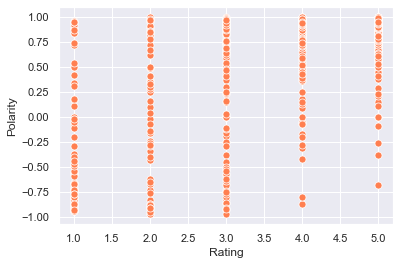

In [166]:
sns.scatterplot(x='Rating',y='Polarity', data= df, s= 50, color = 'coral')

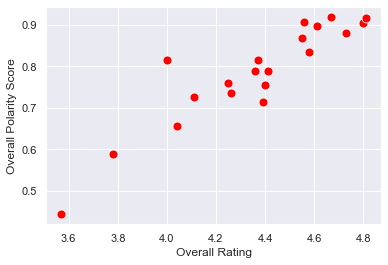

In [169]:
sns.scatterplot(x='Overall Rating',y='Overall Polarity Score', data= new, s= 80, color = 'red')